In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [6]:
df = df.drop(['ctz', 'state', 'name'], axis=1)

In [14]:
df.head()

,25k,age,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 18 columns):
25k          16164 non-null object
age          16164 non-null int64
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 2.2+ MB


In [8]:
def get_float(item):
    if item != '-':
        return float(item) 
    else:
        return np.NaN

In [9]:
def getGender(gender_str):
    if gender_str == 'M':
        return 1
    else:
        return 0

In [15]:
df['25k'] = df['25k'].apply(get_float)
df['10k'] = df['10k'].apply(get_float)
df['half'] = df['half'].apply(get_float)
df['official'] = df['official'].apply(get_float)
df['30k'] = df['30k'].apply(get_float)
df['5k'] = df['5k'].apply(get_float)
df['35k'] = df['35k'].apply(get_float)
df['20k'] = df['20k'].apply(get_float)
df['40k'] = df['40k'].apply(get_float)
df['gender'] = df['gender'].apply(getGender)

In [17]:
df = df.drop(['country', 'bib'], axis=1)

In [19]:
df = df.drop(['city'], axis=1)

In [20]:
df.head()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,40.93,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,64.90,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,64.92,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,42.00,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,40.57,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 15 columns):
25k          16141 non-null float64
age          16164 non-null int64
division     16164 non-null int64
10k          16138 non-null float64
gender       16164 non-null int64
half         16148 non-null float64
official     16164 non-null float64
overall      16164 non-null int64
pace         16164 non-null float64
30k          16147 non-null float64
5k           16098 non-null float64
genderdiv    16164 non-null int64
20k          16147 non-null float64
35k          16143 non-null float64
40k          16147 non-null float64
dtypes: float64(10), int64(5)
memory usage: 1.8 MB


## K-Means clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [25]:
df = df.dropna()

In [27]:
df_norm = normalize(df)

In [29]:
from sklearn.decomposition import PCA
df_pca = PCA(2).fit_transform(df_norm)

### 2 clusters

In [30]:
y_pred = KMeans(n_clusters=2, random_state=101).fit_predict(df_pca)

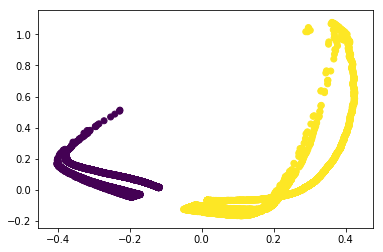

In [31]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred)
plt.show()

In [36]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

### 3 clusters

In [32]:
y_pred3 = KMeans(n_clusters=3, random_state=101).fit_predict(df_pca)

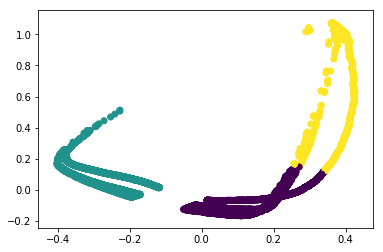

In [33]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred3)
plt.show()

### 4 clusters

In [34]:
y_pred4 = KMeans(n_clusters=4, random_state=101).fit_predict(df_pca)

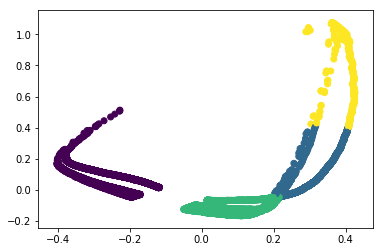

In [35]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred4)
plt.show()

## Mini batch K-Means

In [38]:
from sklearn.cluster import MiniBatchKMeans
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(df_pca)

# Add the new predicted cluster memberships to the data frame.
pred_mini = minibatchkmeans.predict(df_pca)

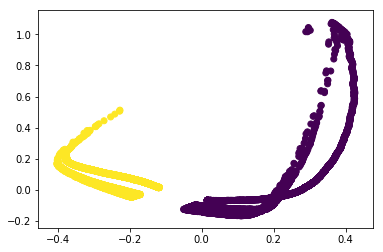

In [39]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

In [40]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(df_pca)

# Add the new predicted cluster memberships to the data frame.
pred_mini = minibatchkmeans.predict(df_pca)

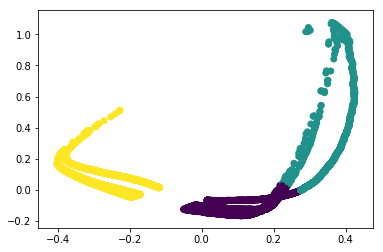

In [41]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

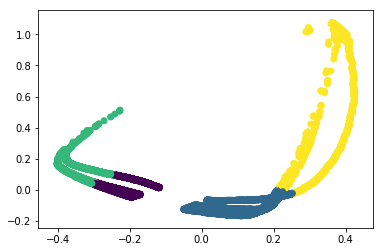

In [43]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

## Mean-shift

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
#ndwidth = estimate_bandwidth(df_pca, quantile=0.2, n_samples=500)
bandwidth = 0.3

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
bandwidth

Number of estimated clusters: 2


0.3

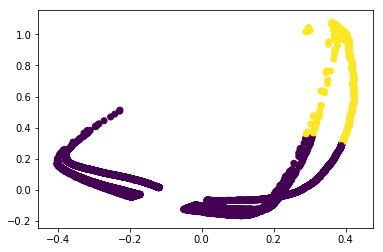

In [48]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.show()

## Spectral clustering

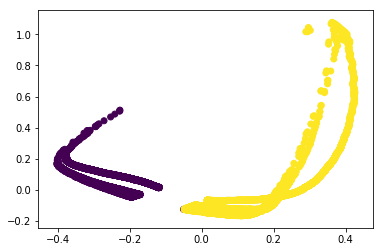

In [49]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(df_pca)

#Predicted clusters.
predict=sc.fit_predict(df_pca)

#Graph results.
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predict)
plt.show()

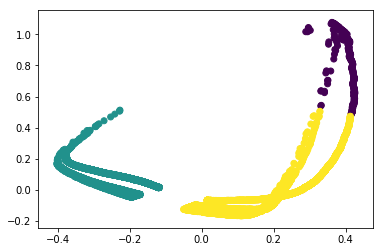

In [50]:
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(df_pca)

#Predicted clusters.
predict=sc.fit_predict(df_pca)

#Graph results.
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predict)
plt.show()